In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LogNorm
import numpy as np

from autorad.world import World
from autorad.robot import Robot
from autorad.source import Source
from autorad.search import gradient_search
from autorad.plotting import plot_results_map, plot_results_measurements, animate_results

In [3]:
# Initialize

# World
world = World(nx=50, ny=50, bkgrate=5.)

# Create occlusion mask
g = world.occlusion_mask
## border
g[0,:] = 1
g[-1,:] = 1
g[:,0] = 1
g[:,-1] = 1
## walls
g[25:,25] = 1
g[:15,10] = 1
g[30,:15] = 1
g[40,-10:] = 1
## box
g[10,20:30] = 1
g[15,20:31] = 1
g[10:15,20] = 1
g[10:15,30] = 1
world.occlusion_mask = g
## attenuation factor
world.occlusion_mu = 0.5

# Robot
robot = Robot(world, x=2, y=2, mt=0.1)

# Source
source = Source(world, strength=3.7e6, x=48, y=48)

In [4]:
# Search!
robot = gradient_search(robot, source)

Found source after 658 steps (65.80 s)


<IPython.core.display.Javascript object>


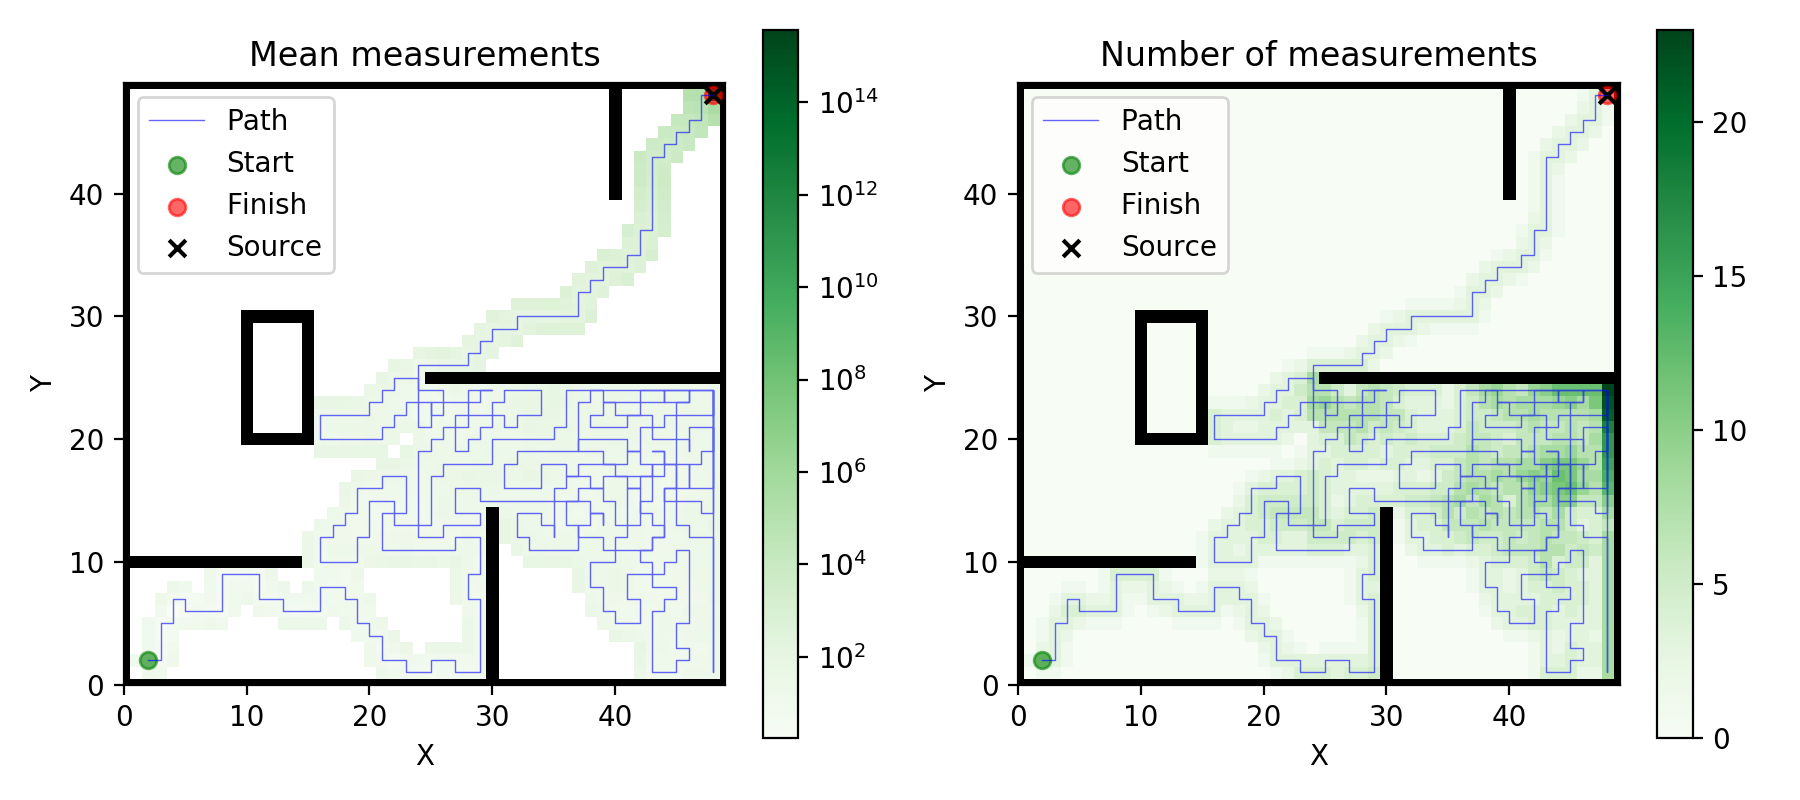

<IPython.core.display.Javascript object>


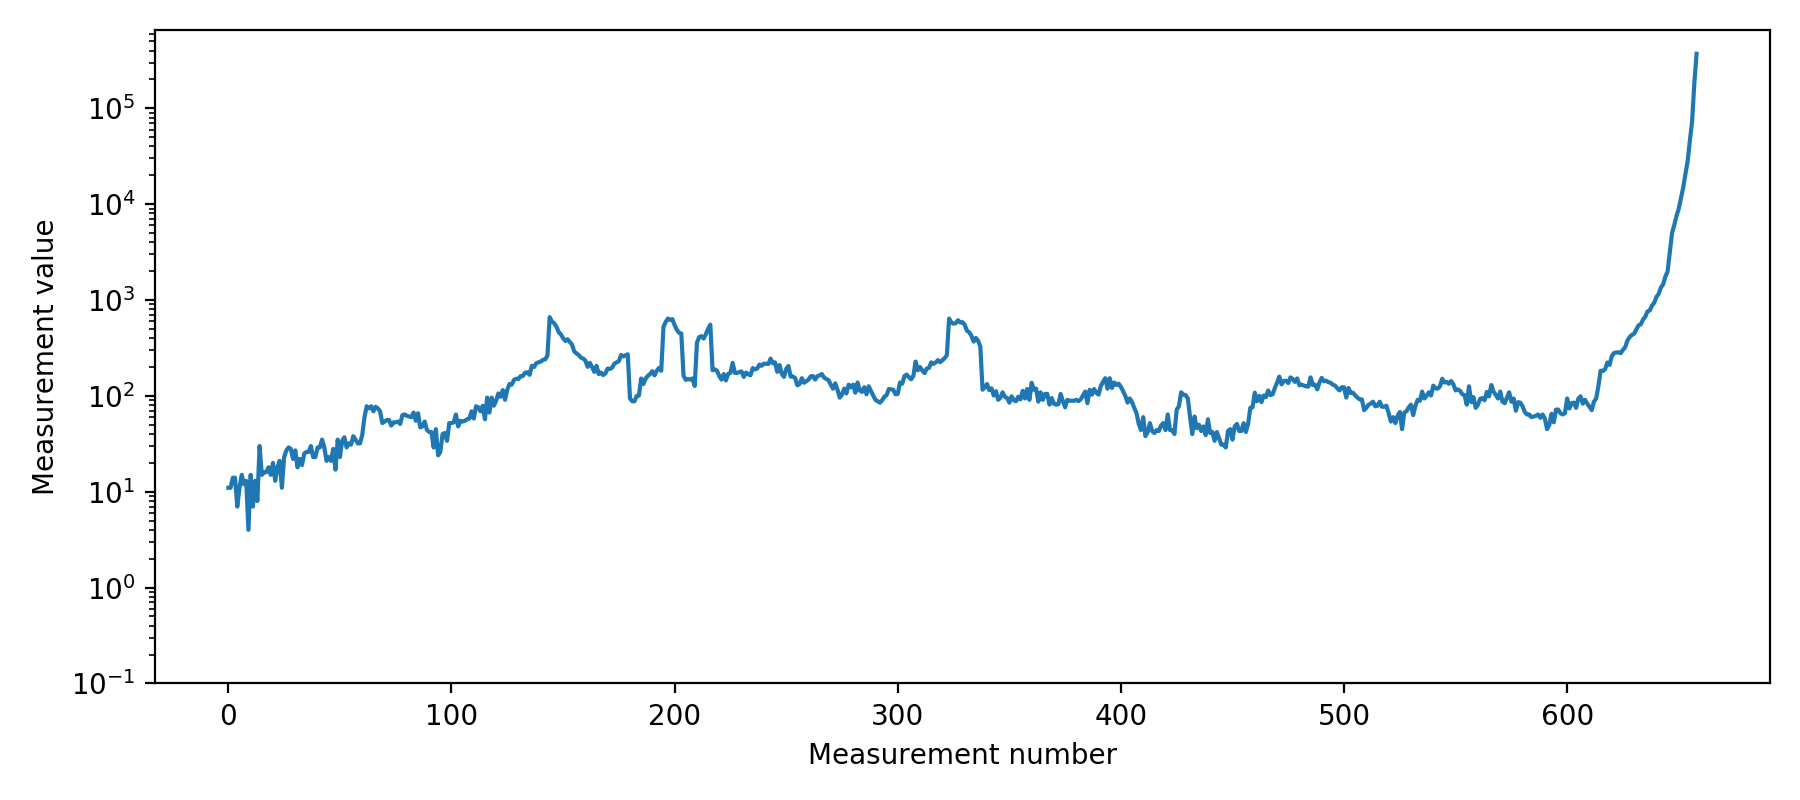

In [5]:
# Plot results
plot_results_map(robot, source)
plot_results_measurements(robot)

<IPython.core.display.Javascript object>


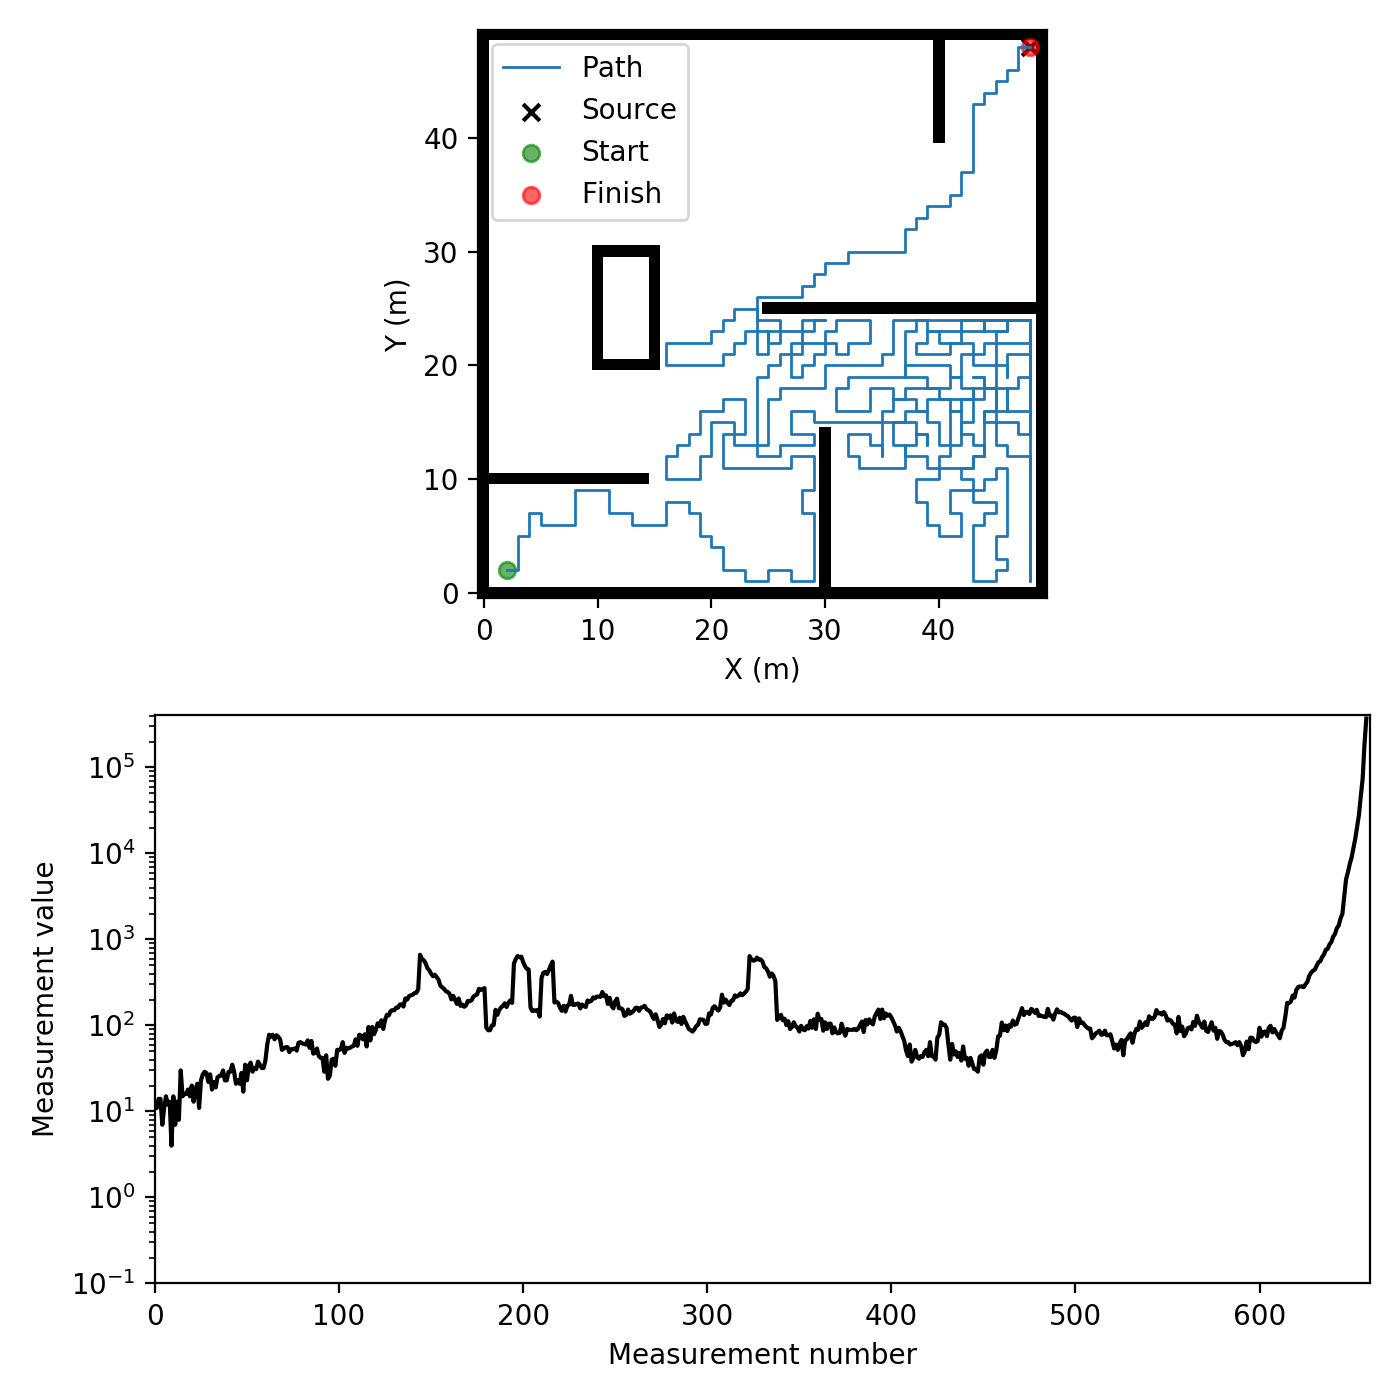

In [6]:
# Animate the results
animate_results(robot, source)